# TP3 : Reconstruction du signal audio : TFCT inverse

Réalisé par
+ Lisa TOUZARI
+ Anis NEHMAR

Groupe
+ ISI 2b

In [1]:
# importer les bibliothèques utiles dans ce tp
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import math
import numpy as np
import cmath
from IPython.display import display, Audio

1600


<ipython-input-2-cc2d9fbf7998>:54: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(abs(x_mat)), aspect="auto", extent=(0,len(y)/Fe,0,Fe))


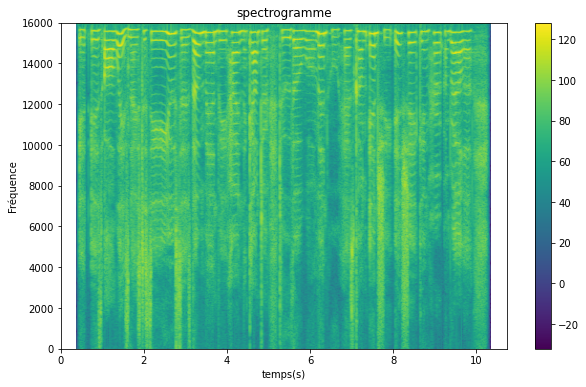

In [2]:
# définition de la fonction tfct
def tfct (path,N_win,N_hop,N_fft):
    #chargement du signal audio
    x = wav.read(path)
    Fe = x[0]
    Te = 1/Fe
    x_vect = x[1]
    
    H = np.hamming(N_win)
    
    #isoler et tracer l'allure tomporelle d'une trame 
    nbr_trames=int((len(x_vect)-N_win)/N_hop +1)
    
    x_trames = np.zeros((nbr_trames,N_win),dtype=complex)
    t = np.zeros((nbr_trames,N_win))

    for k in range(0,nbr_trames):
        x_trames[k,:] = x_vect[k*N_hop:k*N_hop +N_win]*H


    for k in range(0,nbr_trames):
        t[k,:] = np.arange(k*N_win*Te,(k+1)*N_win*Te,Te)[0:N_win]# axe de temps
    
   
    
    #la matrice de tfct
    f = np.fft.fftfreq(N_fft,Te)
    #f=np.linspace(0,Fe,N_fft)
    nl=math.floor(N_fft/2+1)
    #print(nl)
    x_mat = np.zeros((nl,nbr_trames),dtype=complex)
    
    for i in range(nbr_trames):
        x= np.fft.fft(x_trames[i],n=N_fft)
        #print(len(x[0:nl]))
        x_mat[:,i] = x[0:nl]       
        
    return x_mat,f,t

# test de la fct tfct sur le signal sound.wav
x = wav.read('sound.wav')
Fe = x[0]
Te = 1/Fe
y = x[1]

N_win=int(100*(10**-3)*Fe)
print(N_win)
N_hop= int(N_win/4)
N_fft=N_win

x_mat,f,t=tfct('sound.wav',N_win,N_hop,N_fft)

plt.figure(figsize=(10,6))
plt.imshow(20*np.log10(abs(x_mat)), aspect="auto", extent=(0,len(y)/Fe,0,Fe))    
plt.title("spectrogramme")
plt.xlabel("temps(s)")
plt.ylabel("Fréquence")
plt.colorbar()

C:\Users\Admin\anaconda3\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'comparaison entre le signal sound.wav et le signal reconstruit')

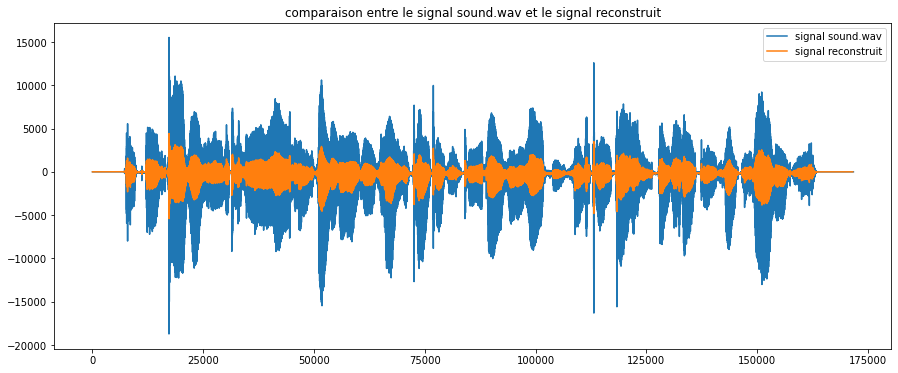

In [3]:
# définition et test de la fonction itfct
def itfct(x_tfct,N_hop,N_fft,Fs):    
    C=x_tfct.shape[1] # nombre de colonnes 213
    L=x_tfct.shape[0] # nombre de lignes = nl=801
    N_win=N_fft    
    x_mat=np.zeros((N_fft,C),dtype=complex)
    
    # completer la matrice tfct
    for i in range(C):
        x_mat[0:L,i]=x_tfct[:,i]
  
    for j in range (C):
        for i  in range(1,L):
            x_mat[-i,j]=x_tfct[i-1,j].conjugate()
    
    # calcul du nombre de trames
    nbr_trames=x_tfct.shape[1] 
    
    # Préallocation de mémoire pour le signal y
    n=N_fft+(nbr_trames-1)*N_hop
    y=np.zeros(n,dtype=complex) 
    t=np.zeros(n)
    
    yl=np.zeros((N_fft,nbr_trames),dtype=complex)    
    for i in range (nbr_trames):
        yl[:,i]=np.fft.ifft(x_mat[:,i])       
        
    # reconstruction de y_l
    y_tilde=np.zeros((n,nbr_trames),dtype=complex)
    
    for i in range (nbr_trames):
        y_tilde[i*N_hop:i*N_hop+N_fft,i]=yl[:,i]
        
    
    #création de l'axe temporel
    for i in range(n):
        t[i]=i/Fs
    
    for i in range(nbr_trames):
        y+=y_tilde[:,i]
    
    H = np.hamming(N_win)
    # normalisation
    k=0
    for i in range (N_win):
        k+=H[i]/N_hop    
     
    return y/k,t

res,t=itfct(x_mat,N_hop,N_fft,Fe)
display(Audio(res,rate=Fe))

# visualisation du signal sound.wav et du signal reconstruit
plt.figure(figsize=(15,6))
plt.plot(y,label='signal sound.wav')
plt.plot(res,label='signal reconstruit')
plt.legend()
plt.title('comparaison entre le signal sound.wav et le signal reconstruit')

In [4]:
erreur=0
y_norm = np.zeros(len(res),dtype=complex)
for i in range(len(res)):
    y_norm[i]= y[i] - np.mean(y)
y_norm = y_norm/np.std(y)

res_norm = np.zeros(len(res),dtype=complex)
for i in range(len(res)):
    res_norm[i]= res[i] - np.mean(res)
res_norm = res_norm/np.std(res)

for i in range(len(res)):
    erreur+=(y_norm[i]-res_norm[i])**2
erreur= erreur/len(res) 
# la valeur de l'erreur
print(abs(erreur))

0.4663012189305988


frequence d'échantillonnage = 16000
nombre d'échantillons 158340


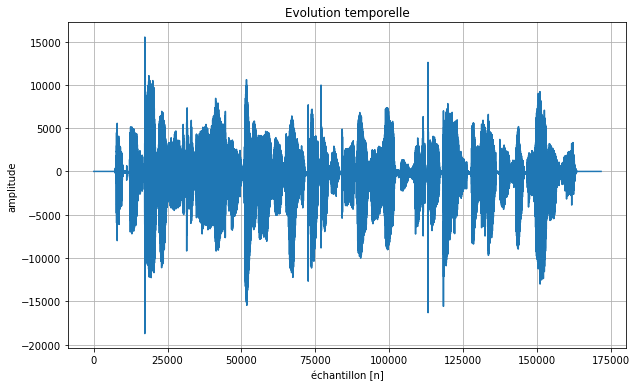

In [5]:
# chargement du signal mix.wav
mix=wav.read('mix.wav')
Fe = mix[0]
Te = 1/Fe
mix = mix[1]

display(Audio(mix,rate=Fe))
print(f"frequence d'échantillonnage = {Fe}")
print(f"nombre d'échantillons {len(mix)}")
plt.figure(figsize=(10,6))
plt.plot(y)
plt.title("Evolution temporelle")
plt.xlabel("échantillon [n]")
plt.ylabel("amplitude")
plt.grid()

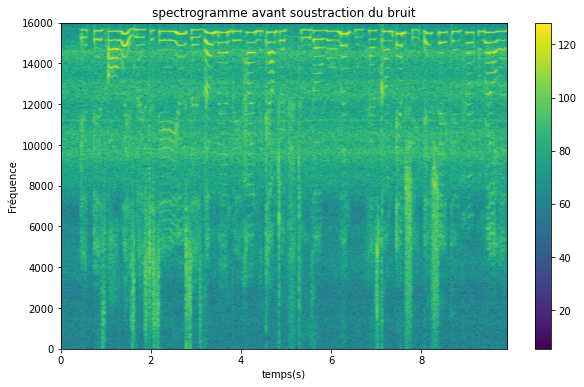

In [6]:
# calcul de la tfct du signal bruité
N_win=int(100*(10**-3)*Fe)
N_hop= int(N_win/4)
N_fft=N_win

mix_mat,f,t=tfct('mix.wav',N_win,N_hop,N_fft)

# le spectrogramme
plt.figure(figsize=(10,6))
plt.imshow(20*np.log10(abs(mix_mat)), aspect="auto", extent=(0,len(mix)/Fe,0,Fe))    
plt.title("spectrogramme avant soustraction du bruit")
plt.xlabel("temps(s)")
plt.ylabel("Fréquence")
plt.colorbar()

0.47125


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'spectre du bruit')

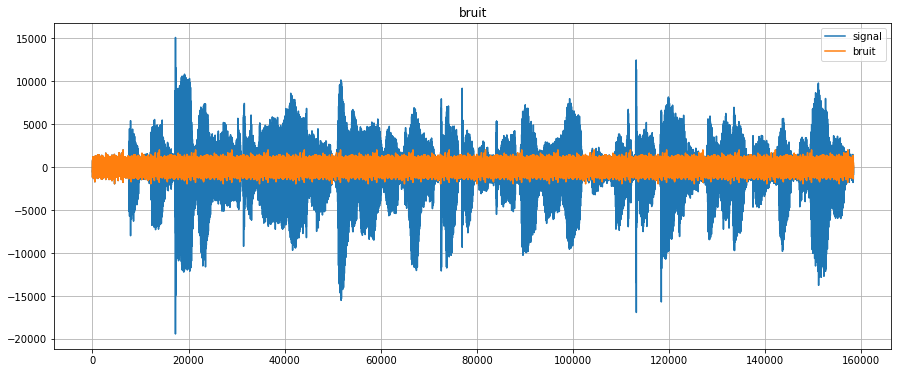

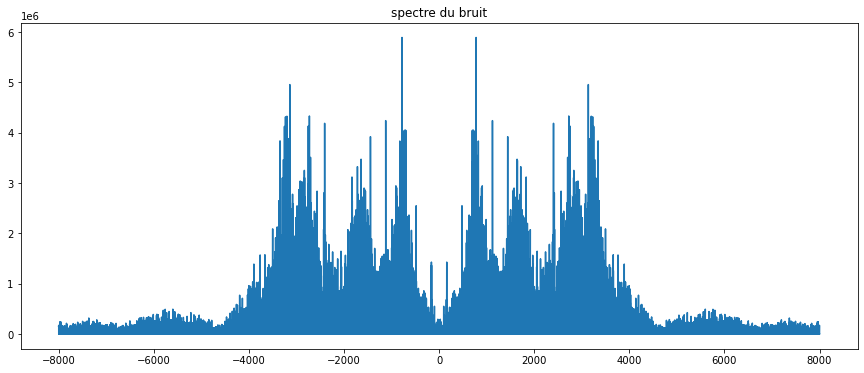

In [7]:
# construction du signal bruit
bruit=np.zeros(len(mix),dtype=complex)
Te=1/Fe
print(7540*Te)
n1=int(np.floor(0.47125/Te))

bruit[0:n1]=mix[0:n1]

for i in range(1,21):
    bruit[i*n1:i*n1+n1]=bruit[0:n1]

display(Audio(abs(bruit),rate=Fe))

plt.figure(figsize=(15,6))
plt.plot(mix,label='signal')
plt.plot(bruit,label='bruit')
plt.legend()
plt.title('bruit')
plt.grid()

# spectre du bruit
f = np.fft.fftfreq(len(mix),Te)
spectre = np.fft.fft(bruit)
plt.figure(figsize=(15,6))
plt.plot(np.fft.fftshift(f), abs(np.fft.fftshift(spectre)))
plt.title('spectre du bruit')

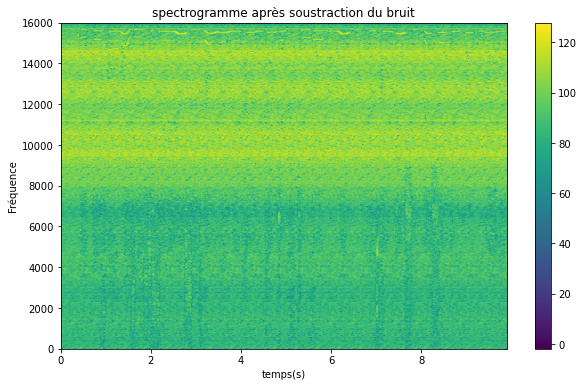

In [8]:
# tfct du bruit
bruit_mat,f,t=tfct('bruit.wav',N_win,N_hop,N_fft)

clean_mat=abs(mix_mat)-abs(bruit_mat)

# le spectrogramme du signal debruité
plt.figure(figsize=(10,6))
plt.imshow(20*np.log10(abs(clean_mat)), aspect="auto", extent=(0,len(mix)/Fe,0,Fe))    
plt.title("spectrogramme après soustraction du bruit")
plt.xlabel("temps(s)")
plt.ylabel("Fréquence")
plt.colorbar()



In [9]:
# redressement du signal debruité
print(clean_mat.shape)
clean_mat_redres=np.zeros((801,392),dtype=complex)
for i in range (801):
    for j in range (392):
        if clean_mat[i,j]<0:
            clean_mat_redres[i,j]=0
        else:
            clean_mat_redres[i,j]=clean_mat[i,j]

(801, 392)


In [10]:
# reconstruction du signal debruité 
res,t=itfct(clean_mat,N_hop,N_fft,Fe)
display(Audio(abs(res),rate=Fe))

In [ ]:
# reconstruction du signal debruité à partir du spectre complexe
clean_mat_arg=np.zeros((801,392),dtype=complex)
for i in range (801):
    for j in range (392):
        clean_mat_arg[i,j]= (abs(clean_mat_redres)[i,j])*complex(np.cos(cmath.phase(x_mat[i,j])),np.sin(cmath.phase(x_mat[i,j])))

In [ ]:
res,t=itfct(clean_mat_arg,N_hop,N_fft,Fe)
display(Audio(abs(res),rate=Fe))